# 1. Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='once')
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import folium
from sklearn.model_selection import train_test_split 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

/Users/260153183qq.com/opt/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/260153183qq.com/opt/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/260153183qq.com/opt/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# 2. Loading data

In [2]:
DATA_DIR = "/Users/260153183qq.com/Desktop/YueDu_final project/data"
pd.set_option("display.precision", 2)
raw_df = pd.read_csv(os.path.join(DATA_DIR, 'raw_AB_NYC_2019.csv'))
raw_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,nan,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.68,-73.95,Private room,70,2,0,NaN,nan,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70,-73.93,Private room,40,4,0,NaN,nan,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81,-73.95,Entire home/apt,115,10,0,NaN,nan,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.76,-73.99,Shared room,55,1,0,NaN,nan,6,2


# 3. Exploratory data analysis and data visualization

#### It totally have 5 neighbourhood_group, they are Brooklyn, Manhattan, QUeens, Staten Island and Bronx

In [3]:
raw_df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

#### There have 3 type of room: private room, entire home/apt and shared room.

In [4]:
raw_df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

#### Visualization 1: Rentals goupy by different roome types and different neighborhood_groups

From the bar graph below, we can see Mahattan and Brooklyn have most of airbnb rentals. Generally, private room seems more popular than other two kind of room types, but in Manhattan, entire home/apt are more popular than private rooms.

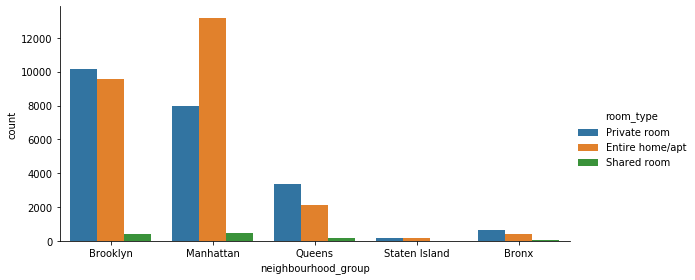

In [5]:
sns.catplot(x = "neighbourhood_group",  data = raw_df, kind = 'count', hue = "room_type",height = 4, aspect = 2);

#### Visualization 2: Average rental price across neighbourhood_group

From the graph below, we can know Mahattan's average airbnb price is highest.

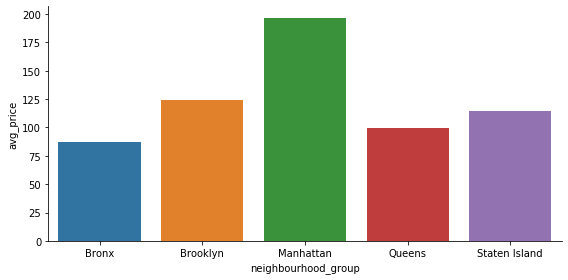

In [6]:
df_avg_price=pd.DataFrame(raw_df.groupby('neighbourhood_group')['price'].mean()).reset_index()
df_avg_price.columns=('neighbourhood_group','avg_price')
sns.catplot(x = "neighbourhood_group", y='avg_price', data = df_avg_price, kind = 'bar',height = 4, aspect = 2);

#### Visualization 3: NYC airbnb rentals' availability through the year

According to the violin graph, most of NYC airbnb rentals's availability are less than a quarter of a year.

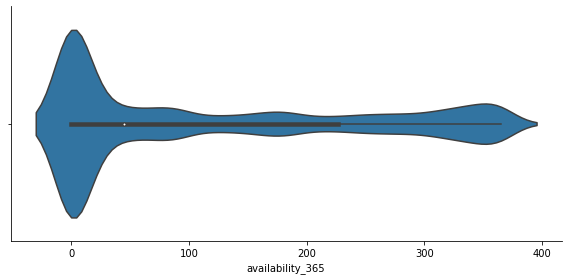

In [7]:
sns.catplot(x = "availability_365",  data = raw_df, kind = 'violin', height = 4, aspect = 2);

####  Visualization 4: violin graph for NYC airbnb rentals' avaiability for each of the neighbourhood_group

The violin graph can clearly demponstrates the density and distribution of avaiability day for each of the neighbourhood_group. According to the Violin graph below, the Brooklyn and Manhattan' airbnb rentals availability day are most less than a quarter of a year. The Queens, Staten Island and Bronx's airbnb rentals availability day looks have more even distributions. 

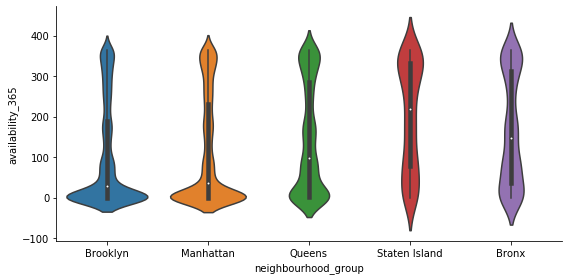

In [8]:
sns.catplot(x = "neighbourhood_group", y='availability_365', data = raw_df, kind = 'violin', height = 4, aspect = 2);

#### Visualization 5: Box graph for NYC airbnb rental's availability for each of the neighbourhood_group

Box plot can clearly demonstrates the minimum, first quartile, median, third quartile, and maximum values, and it also can identify the outlier in data. From the box plot below, we can see the medium value of Staten Island is highest, and the availability of Staten Island is greater than other neighbourhood_groups.

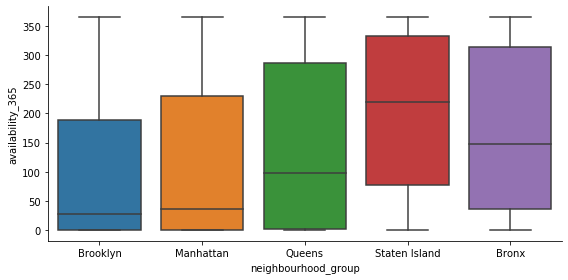

In [9]:
sns.catplot(x = "neighbourhood_group", y='availability_365', data = raw_df, kind = 'box', height = 4, aspect = 2);

#### Visualization 6: Scatterplot of NYC airbnb rentals.

Using rentals' latitude and longitude to construct scatterplot can clearly shows the distribution of these airbnb rentals and it is more like a map of NYC airbnb rentals.

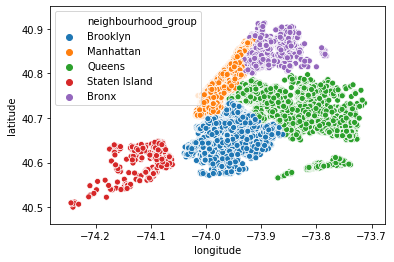

In [10]:
sns.scatterplot(raw_df.longitude,raw_df.latitude,hue=raw_df.neighbourhood_group)

#### Visualization 7: Top 10 neighborhood

Regard to the NYV airbnb rentals, the top 10 neighborhoods are Williamsburg, Bedford-Stuyvesant, Harlem, Bushwick, Upper West Side, Hell's Kitchen, East Village, Upper East Side, Crown Heights, Midtown.

Four of them are located in the Brooklyn, and six of them are located in the Manhattan.

In [11]:
top_neighborhood=pd.DataFrame(raw_df['neighbourhood'].value_counts()).reset_index()
top_neighborhood.columns=('neighbourhood','rentals')
top_10_neighborhood = top_neighborhood[:10]

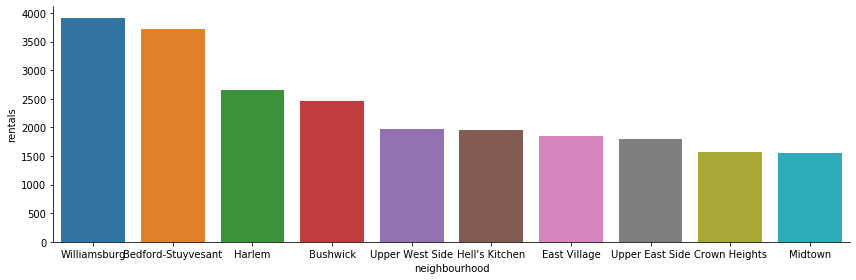

In [12]:
sns.catplot(x = "neighbourhood", y='rentals', data = top_10_neighborhood, kind = 'bar',height = 4, aspect = 3);

# 4. Data Preprocessing, Modeling and Evaluation

#### 4.1 Data columns drop and data filling

There are many null values in data. Columns name, host_name, last_review can be dropped, because they have nothing to do with my analysis. As for column review_per_month, I will filling the null value by 0. 

In [14]:
raw_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [15]:
preprocessing_df=raw_df
preprocessing_df.drop(['name','host_name','last_review','id','host_id'],axis = 1,inplace=True)
preprocessing_df['reviews_per_month'].fillna(0,inplace=True)

In [16]:
# Due to dataset is a little bit large, so i want to save part of it as my submit data.

preprocessing_df[:100].to_csv('sample_preprocess_data.csv',index=False)

#### 4.2 Data train_test_ split

In [17]:
x_columns = preprocessing_df.columns.drop('price')
X = preprocessing_df[x_columns]
y = preprocessing_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, random_state = 1)

#### 4.3 Create a transformer instance

This transformer instance mainly include two parts. The first part is to standardize the columns which have numeric values. The second part is to encode columns which have categoric values. Then combine this two parts as a whole transformer.

In [18]:
numeric_features = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month',
                        'calculated_host_listings_count','availability_365']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['neighbourhood_group','neighbourhood','room_type']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#### 4.4 Modeling fitting, predict and evaluation.

I use three kind of regression models, which are logistic regression model, linear regression model and gradient boosting regression model to build the models and evaluate their performances. Under gradient boosting regression model i use random_grid_search to tune the hyperparameter learning_rate and n_estimators and find the best practices.

These three models evaluation results are as following:

Logistic Regression model:   MSE: 64.2138255445342      R2: 0.04421469775204945

Linear Regression Model:     MSE: 72.28930718765403     R2: 0.0889203071853174

Gradient Boosting Model:     MSE: 66.78004229879238     R2: 0.1219741178667394


###### 4.4.1 Logistic Regression Model

In [19]:
logistic_model=Pipeline(steps=([('preprocessor', preprocessor),
                      ('Logistic', LogisticRegression())]))
logistic = logistic_model.fit(X_train, y_train)

/Users/260153183qq.com/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
y_logistic_pred = logistic.predict(X_test)
mae_logistic = mean_absolute_error(y_test, y_logistic_pred)
r2_logistic = r2_score(y_test, y_logistic_pred)
print("The logistic regression model performance is:")
print("---------------------------------------------")
print('mean absoulte error is {}'.format(mae_logistic))
print('R2 score is {}'.format(r2_logistic))

The logistic regression model performance is:
---------------------------------------------
mean absoulte error is 64.2138255445342
R2 score is 0.04421469775204945


###### 4.4.2 Linear Regression Model

In [21]:
linear_model=Pipeline(steps=([('preprocessor', preprocessor),
                      ('Linear', LinearRegression())]))
linear = linear_model.fit(X_train, y_train)

In [22]:
y_linear_pred  = linear.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_linear_pred)
r2_linear = r2_score(y_test, y_linear_pred)
print("The linear regression model performance is:")
print("---------------------------------------------")
print('mean absoulte error is {}'.format(mae_linear))
print('R2 score is {}'.format(r2_linear))

The linear regression model performance is:
---------------------------------------------
mean absoulte error is 72.28930718765403
R2 score is 0.0889203071853174


###### 4.4.3 Gradient Boosting Regression

I will use random_grid_search to tune hyperparameter learning_rate and n_estimators.

In [23]:
# The range of hyperparameter learning_rate and n_estimators.

param_dist = {
               'learning_rate':list(np.linspace(0.05, 0.5, 10, dtype = float)),
               'n_estimators': list(np.linspace(50, 500, 10, dtype = int))}

In [24]:
# Using random_grid_search to tune hyperparameter learning_rate and n_estimators.

gb = GradientBoostingRegressor()
random_grid_search = RandomizedSearchCV(estimator = gb, param_distributions = param_dist, 
                          cv = 3, n_jobs = -1, verbose = 2, n_iter = 10)
gb_model=Pipeline(steps=([('preprocessor', preprocessor),
                      ('gb', random_grid_search)]))
gb_random=gb_model.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.8min finished


In [26]:
# Using the bestestimator attributes of the random_grid_search objectCheck to check the parameters that return the
# highest accuracy. 
# As below, we can see when learning_rate is 0.05 and n_estimators is 150 we get the highest accuracy.

best_gb= random_grid_search.best_estimator_
best_gb

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
# Useing the best model returned from random_grid_search to predict the test set and calculate the model error

best_gb_model=Pipeline(steps=([('preprocessor', preprocessor),
                      ('best_gb', best_gb)]))
gb_pred = best_gb_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, gb_pred)
r2_linear = r2_score(y_test, gb_pred)
print("The gradient boosting regression model performance is:")
print("---------------------------------------------")
print('mean absoulte error is {}'.format(mae_linear))
print('R2 score is {}'.format(r2_linear))

The gradient boosting regression model performance is:
---------------------------------------------
mean absoulte error is 66.78004229879238
R2 score is 0.1219741178667394
